In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/Moderate

In [4]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.layers import BatchNormalization, Dropout, MaxPool2D
from matplotlib import image as mpimg
from keras.optimizers import Adam
from keras.applications import MobileNetV2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
dir = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train'
labels = os.listdir(dir)
labels

['ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']

In [6]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

ModerateDemented 52
NonDemented 2560
VeryMildDemented 1792
MildDemented 717


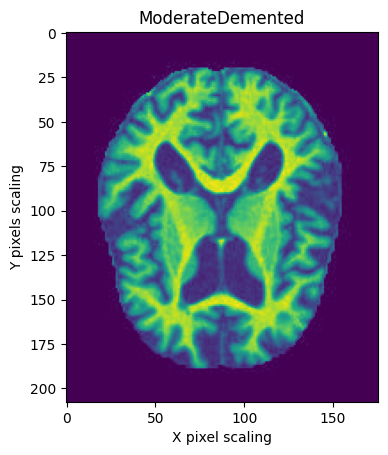

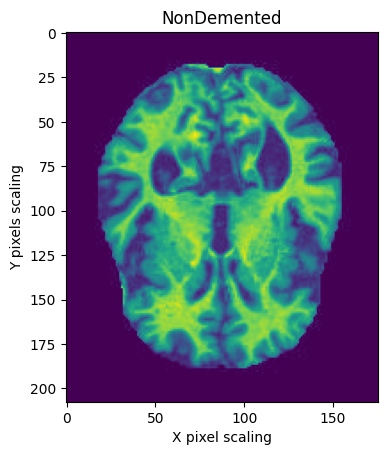

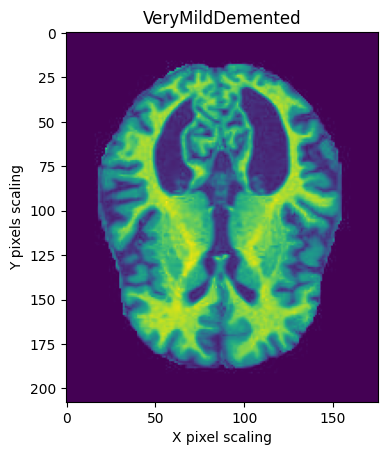

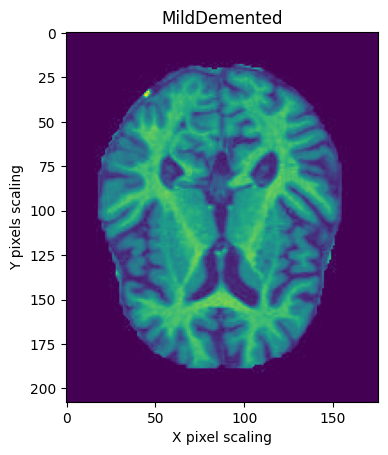

In [8]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [9]:
datagen = ImageDataGenerator(
        samplewise_center=True, 
        rotation_range=10, 
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True, 
        vertical_flip=False,
        rescale=1./255,
        validation_split=0.2)

Found 5121 images belonging to 4 classes.


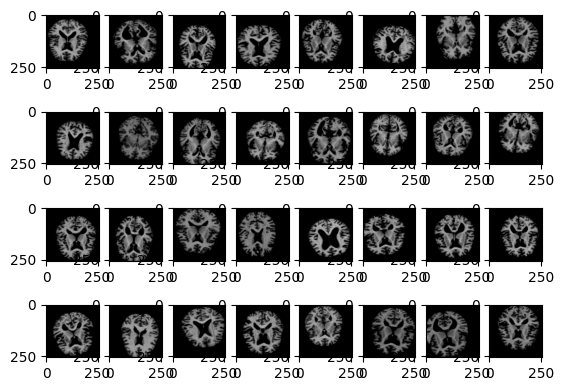

In [10]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(256,256),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [11]:
train_data=datagen.flow_from_directory(dir,
                                       target_size=(256,256),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(256,256),
                                       batch_size=1,
                                       shuffle=False,subset='validation')
validation_data=datagen.flow_from_directory(dir,
                                       target_size=(256,256),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [12]:
model=Sequential()
size=(256,256,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
hi=model.fit(train_data, epochs=200, steps_per_epoch=len(train_data), validation_data=validation_data, validation_steps=len(validation_data))

Epoch 1/200
129/129 [==============================] - 117s 814ms/step - loss: 1.0354 - accuracy: 0.4878 - val_loss: 1.1658 - val_accuracy: 0.4438
Epoch 2/200
129/129 [==============================] - 81s 632ms/step - loss: 0.9904 - accuracy: 0.5159 - val_loss: 0.9757 - val_accuracy: 0.5298
Epoch 3/200
129/129 [==============================] - 82s 633ms/step - loss: 0.9396 - accuracy: 0.5410 - val_loss: 1.0254 - val_accuracy: 0.4868
Epoch 4/200
129/129 [==============================] - 82s 635ms/step - loss: 0.9078 - accuracy: 0.5654 - val_loss: 0.9870 - val_accuracy: 0.5083
Epoch 5/200
129/129 [==============================] - 82s 635ms/step - loss: 0.8938 - accuracy: 0.5639 - val_loss: 1.0033 - val_accuracy: 0.5093
Epoch 6/200
129/129 [==============================] - 81s 626ms/step - loss: 0.8768 - accuracy: 0.5800 - val_loss: 1.0041 - val_accuracy: 0.5161
Epoch 7/200
129/129 [==============================] - 85s 659ms/step - loss: 0.8781 - accuracy: 0.5725 - val_loss: 1.1226 

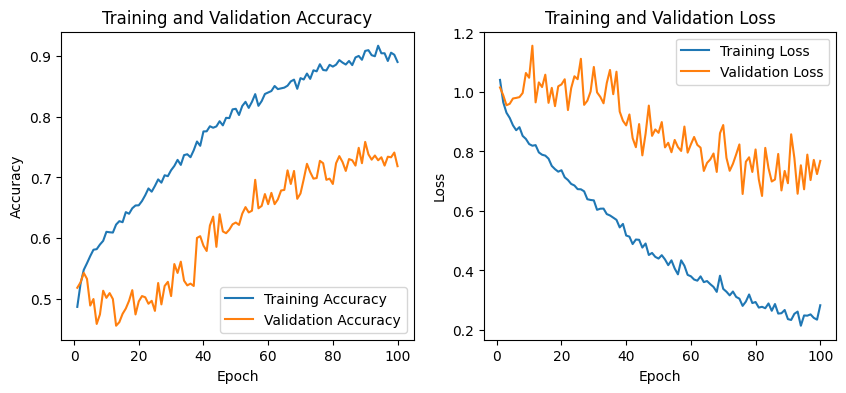

In [36]:
acc = hi.history['accuracy']
val_acc = hi.history['val_accuracy']
loss = hi.history['loss']
val_loss = hi.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1023/1023 [==============================] - 16s 16ms/step - loss: 0.7119 - accuracy: 0.7361
Test loss: 0.7119235396385193
Test accuracy: 0.7360703945159912


In [38]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1023/1023 [==============================] - 16s 16ms/step


array([0, 0, 0, ..., 3, 3, 3])

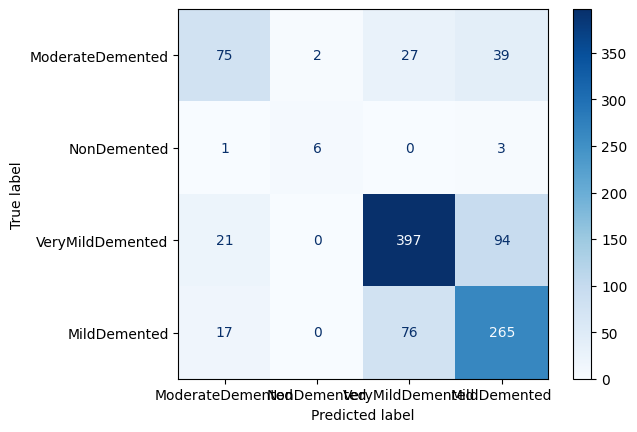

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

In [40]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.66      0.52      0.58       143
           1       0.75      0.60      0.67        10
           2       0.79      0.78      0.78       512
           3       0.66      0.74      0.70       358

    accuracy                           0.73      1023
   macro avg       0.72      0.66      0.68      1023
weighted avg       0.73      0.73      0.73      1023



1023/1023 [==============================] - 17s 16ms/step


/tmp/ipykernel_31/9590084.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr_macro += interp(fpr_macro, fpr[i], tpr[i])


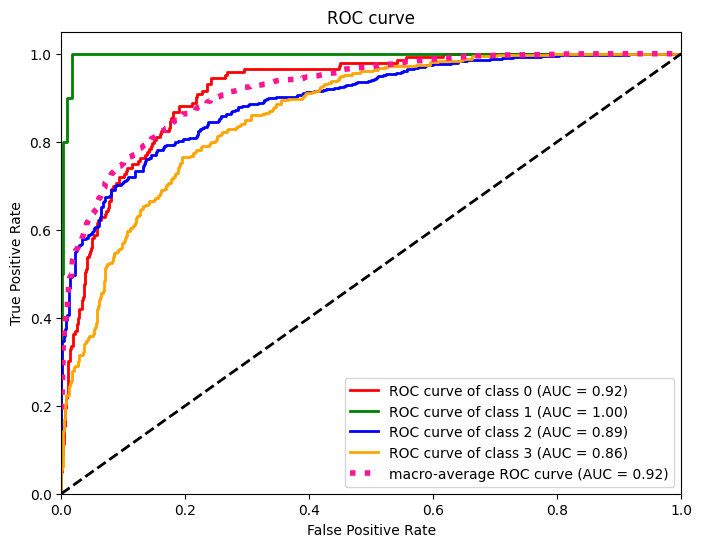

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

# Predicting the probabilities for test data
y_pred_prob = model.predict(test_data)

# Computing ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(n_classes):
    tpr_macro += interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= n_classes
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plotting ROC curve for each class and macro-average ROC curve
plt.figure(figsize=(8,6))
lw = 2
colors = cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro,
         label='macro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_macro),
         color='deeppink', linestyle=':', linewidth=4)

# Plotting random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


# VGG16

In [43]:
train_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=1,
                                       shuffle=False,subset='validation')
validation_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16

# Define the input shape
input_shape = (224, 224, 3)

# Load the pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model and add the pre-trained VGG16 model as the first layer
model = Sequential()
model.add(vgg16)

# Add additional layers to the model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_data, epochs=100, validation_data=test_data)

# Evaluate the model
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                       

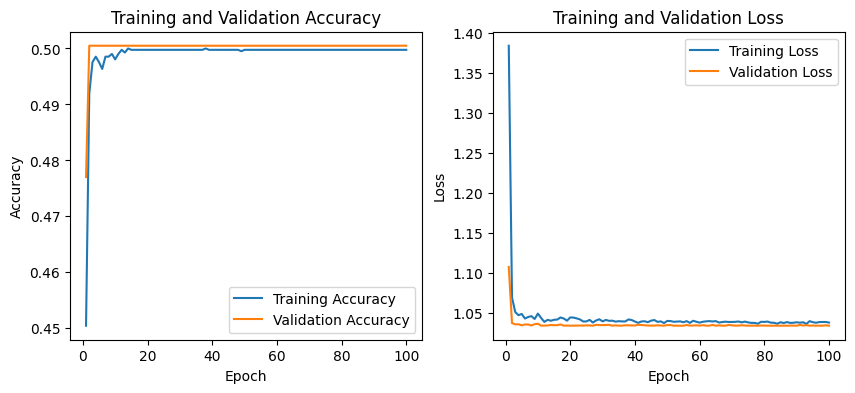

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1023/1023 [==============================] - 16s 16ms/step - loss: 1.0342 - accuracy: 0.5005
Test loss: 1.0342000722885132
Test accuracy: 0.5004887580871582


In [47]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1023/1023 [==============================] - 15s 14ms/step


array([2, 2, 2, ..., 2, 2, 2])

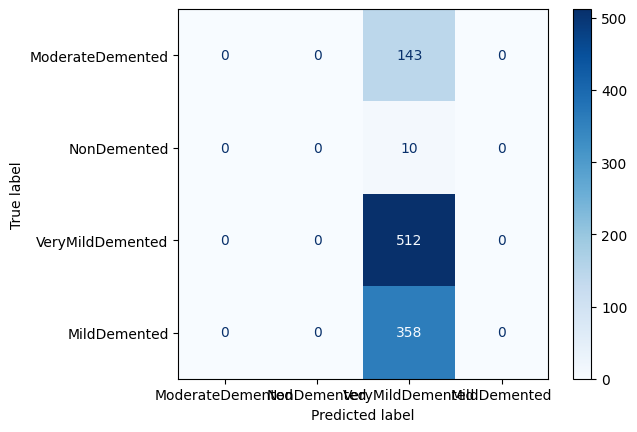

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

In [49]:
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        10
           2       0.50      1.00      0.67       512
           3       0.00      0.00      0.00       358

    accuracy                           0.50      1023
   macro avg       0.13      0.25      0.17      1023
weighted avg       0.25      0.50      0.33      1023



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1023/1023 [==============================] - 14s 14ms/step


/tmp/ipykernel_31/9590084.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr_macro += interp(fpr_macro, fpr[i], tpr[i])


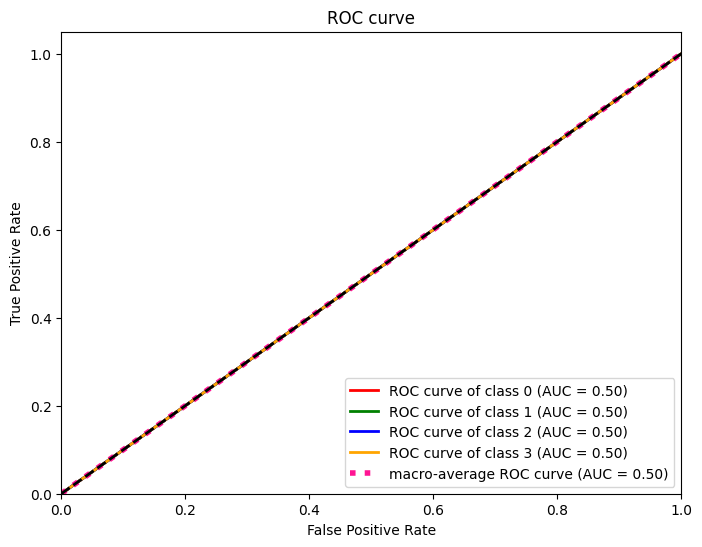

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

# Predicting the probabilities for test data
y_pred_prob = model.predict(test_data)

# Computing ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(n_classes):
    tpr_macro += interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= n_classes
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plotting ROC curve for each class and macro-average ROC curve
plt.figure(figsize=(8,6))
lw = 2
colors = cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro,
         label='macro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_macro),
         color='deeppink', linestyle=':', linewidth=4)

# Plotting random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


# ResNet50

In [52]:
train_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=1,
                                       shuffle=False,subset='validation')
validation_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications.resnet import ResNet50
from keras.preprocessing import image
from keras.applications.resnet import preprocess_input
from keras.utils import to_categorical

# Define the input shape
input_shape = (224, 224, 3)

# Load the pre-trained ResNet50 model
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in resnet50.layers:
    layer.trainable = False

# Create a new model and add the pre-trained ResNet50 model as the first layer
model = Sequential()
model.add(resnet50)

# Add additional layers to the model
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_data, epochs=50, validation_data=test_data)

# Evaluate the model
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               

In [54]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


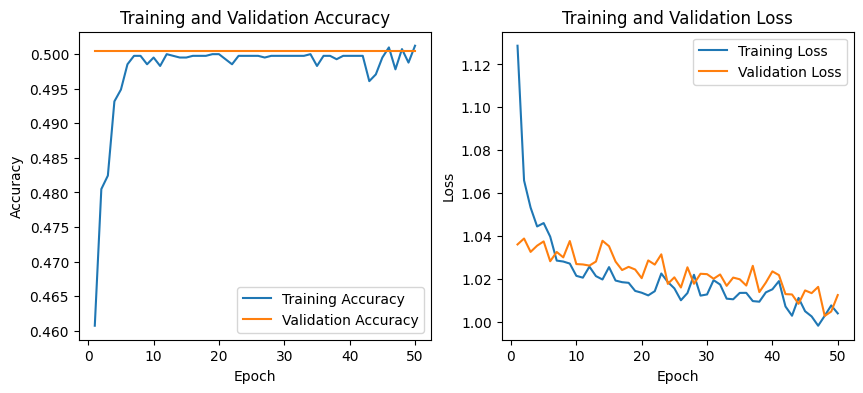

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1023/1023 [==============================] - 18s 18ms/step - loss: 1.0133 - accuracy: 0.5005
Test loss: 1.013345718383789
Test accuracy: 0.5004887580871582


In [57]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1023/1023 [==============================] - 19s 18ms/step


array([2, 2, 2, ..., 2, 2, 2])

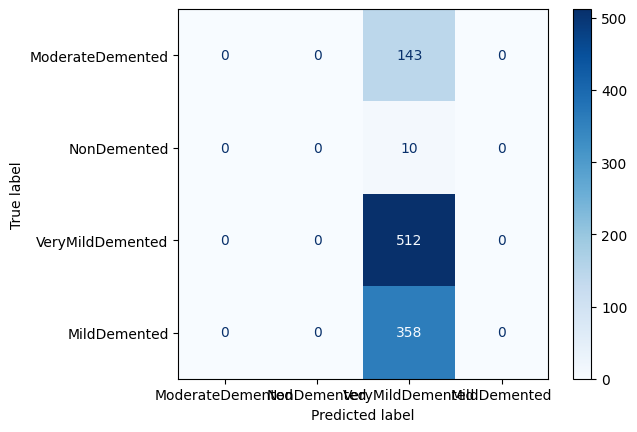

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show();

In [59]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.00      0.00      0.00        10
           2       0.50      1.00      0.67       512
           3       0.00      0.00      0.00       358

    accuracy                           0.50      1023
   macro avg       0.13      0.25      0.17      1023
weighted avg       0.25      0.50      0.33      1023



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1023/1023 [==============================] - 17s 17ms/step


/tmp/ipykernel_31/9590084.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr_macro += interp(fpr_macro, fpr[i], tpr[i])


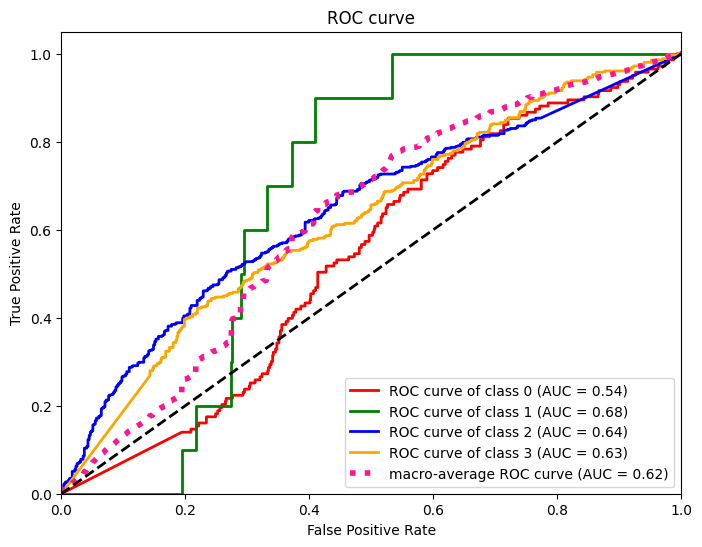

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

# Predicting the probabilities for test data
y_pred_prob = model.predict(test_data)

# Computing ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(n_classes):
    tpr_macro += interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= n_classes
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plotting ROC curve for each class and macro-average ROC curve
plt.figure(figsize=(8,6))
lw = 2
colors = cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro,
         label='macro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_macro),
         color='deeppink', linestyle=':', linewidth=4)

# Plotting random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


# Xception

In [61]:
train_data=datagen.flow_from_directory(dir,
                                       target_size=(299,299),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(299,299),
                                       batch_size=1,
                                       shuffle=False,subset='validation')
validation_data=datagen.flow_from_directory(dir,
                                       target_size=(299,299),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
from keras.utils import to_categorical

# Define the input shape
input_shape = (299,299, 3)

# Load the pre-trained Xception model
xception = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in xception.layers:
    layer.trainable = False

# Create a new model and add the pre-trained Xception model as the first layer
model = Sequential()
model.add(xception)

# Add additional layers to the model
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_data, epochs=50, validation_data=test_data)

# Evaluate the model
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_13 (Dense)            (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)               

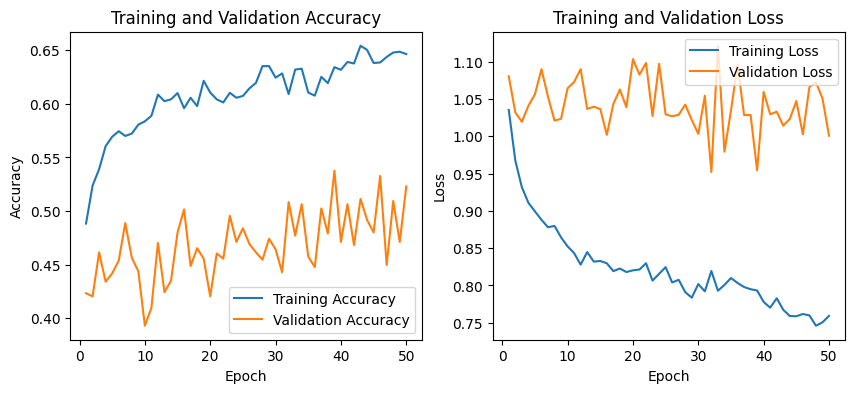

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1023/1023 [==============================] - 25s 24ms/step - loss: 1.0059 - accuracy: 0.5181
Test loss: 1.0058714151382446
Test accuracy: 0.5180840492248535


In [65]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1023/1023 [==============================] - 24s 23ms/step


array([3, 3, 0, ..., 2, 2, 2])

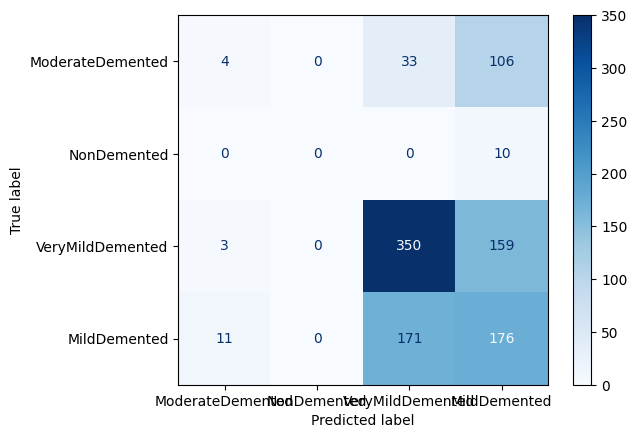

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show();

In [67]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.22      0.03      0.05       143
           1       0.00      0.00      0.00        10
           2       0.63      0.68      0.66       512
           3       0.39      0.49      0.44       358

    accuracy                           0.52      1023
   macro avg       0.31      0.30      0.29      1023
weighted avg       0.48      0.52      0.49      1023



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1023/1023 [==============================] - 23s 22ms/step


/tmp/ipykernel_31/1827603848.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr_macro += interp(fpr_macro, fpr[i], tpr[i])


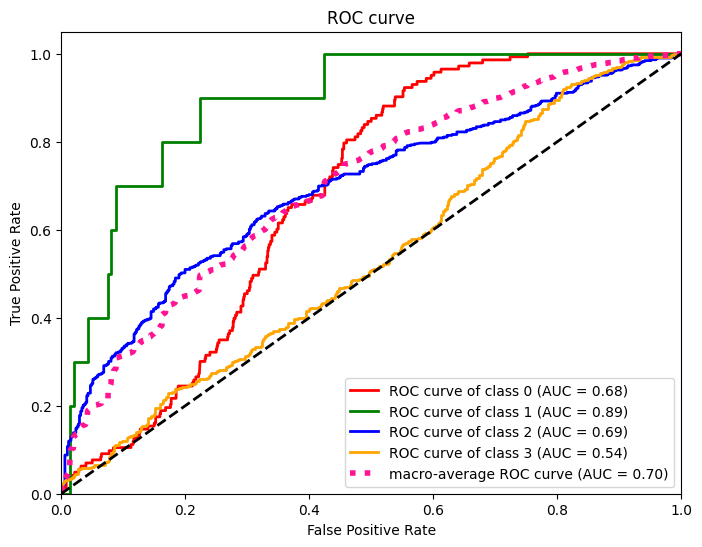

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

# Predicting the probabilities for test data
y_pred_prob = model.predict(test_data)

# Computing ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(n_classes):
    tpr_macro += interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= n_classes
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plotting ROC curve for each class and macro-average ROC curve
plt.figure(figsize=(8,6))
lw = 2
colors = cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro,
         label='macro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_macro),
         color='deeppink', linestyle=':', linewidth=4)

# Plotting random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# MobileNet

In [8]:
train_data=datagen.flow_from_directory(dir,
                                       target_size=(224,224),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')


test_data=datagen.flow_from_directory(dir,
                                       target_size=(299,299),
                                       batch_size=1,
                                       shuffle=False,subset='validation')
validation_data=datagen.flow_from_directory(dir,
                                       target_size=(299,299),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.xception import preprocess_input
from keras.utils import to_categorical

# Define the input shape
input_shape = (224,224, 3)

# Load the pre-trained MobileNet model
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers so they are not trainable
for layer in mobilenet.layers:
    layer.trainable = False

# Create a new model and add the pre-trained Xception model as the first layer
model = Sequential()
model.add(mobilenet)

# Add additional layers to the model
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(train_data, epochs=50, validation_data=test_data)

# Evaluate the model
score = model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 256)               262400    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

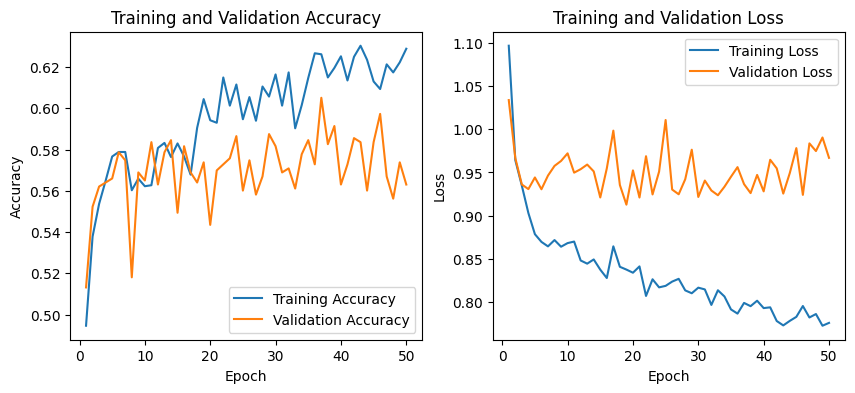

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1023/1023 [==============================] - 26s 26ms/step - loss: 0.9620 - accuracy: 0.5738
Test loss: 0.9619855880737305
Test accuracy: 0.5738025307655334


In [14]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

1023/1023 [==============================] - 25s 23ms/step


array([3, 3, 3, ..., 2, 3, 3])

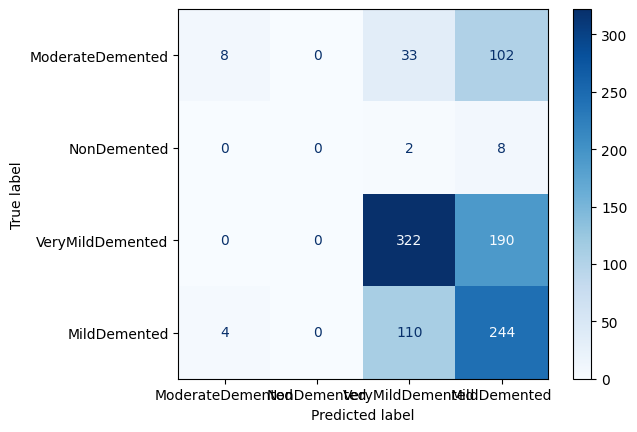

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show();

In [16]:
from sklearn.metrics import classification_report
print(classification_report(test_data.classes, y_classes))

              precision    recall  f1-score   support

           0       0.67      0.06      0.10       143
           1       0.00      0.00      0.00        10
           2       0.69      0.63      0.66       512
           3       0.45      0.68      0.54       358

    accuracy                           0.56      1023
   macro avg       0.45      0.34      0.33      1023
weighted avg       0.60      0.56      0.53      1023



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1023/1023 [==============================] - 25s 25ms/step


/tmp/ipykernel_31/1827603848.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tpr_macro += interp(fpr_macro, fpr[i], tpr[i])


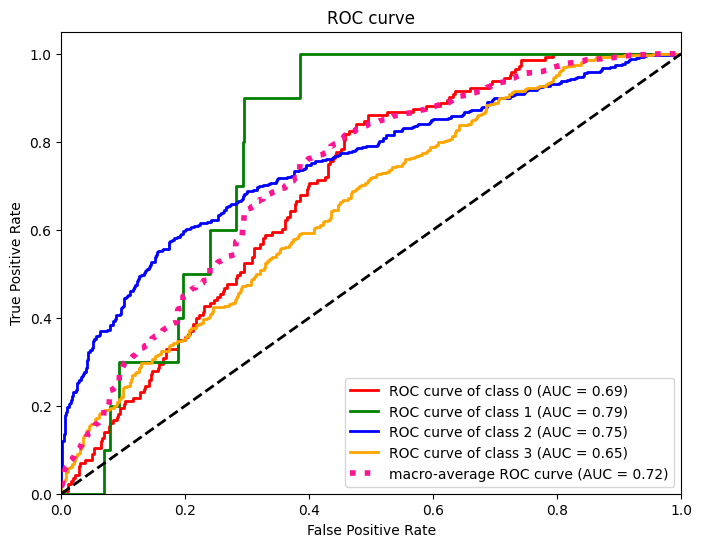

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from scipy import interp

# Predicting the probabilities for test data
y_pred_prob = model.predict(test_data)

# Computing ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_data.classes == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing macro-average ROC curve and ROC area
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_macro = np.zeros_like(fpr_macro)
for i in range(n_classes):
    tpr_macro += interp(fpr_macro, fpr[i], tpr[i])
tpr_macro /= n_classes
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plotting ROC curve for each class and macro-average ROC curve
plt.figure(figsize=(8,6))
lw = 2
colors = cycle(['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot(fpr_macro, tpr_macro,
         label='macro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_macro),
         color='deeppink', linestyle=':', linewidth=4)

# Plotting random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()